In [1]:
import pandas as pd
file = 'ted_main.csv'
df = pd.read_csv(file)

In [2]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Sampling

## 1. Simple random sampling

**pick the views column and choose a random sample of 500 elements then plot the sample after sorting the index**

In [3]:
views = df['views']
len(views)

2550

In [4]:
sample = views.sample(500)
sample

1334     1337967
939      1215549
1566     1537390
2014     1588477
249       217663
          ...   
95        616385
675      2212944
553     16097077
1130      318110
204      1277619
Name: views, Length: 500, dtype: int64

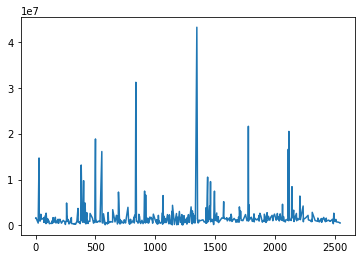

In [5]:
sample.sort_index().plot()

**plot the views original column and see the difference in both distributions**

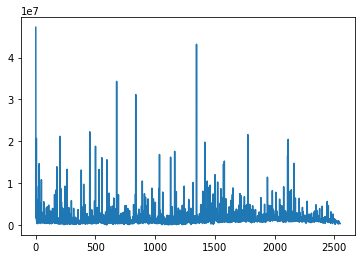

In [6]:
views.plot()

## 2. Stratified random sampling 

**apply the stratified random sampling on the views column with 5 stratified samples and 500 elements in total**

In [7]:
## your code here
minn = views.min()
maxx = views.max()
diff = (views.max() - views.min())
print("Minimum: ",minn)
print("Maximum: ",maxx)
print("difference: ",diff)

Minimum:  50443
Maximum:  47227110
difference:  47176667


In [8]:
m = minn
l = diff//5
g1 = views[views < m+l].dropna()
g2 = views[(views >= m+l) & (views <= m+2*l)].dropna()
g3 = views[(views >= m+2*l) & (views <= m+3*l)].dropna()
g4 = views[(views >= m+3*l) & (views <= m+4*l)].dropna()
g5 = views[views >= m+4*l].dropna()

In [9]:
print("g1= ",len(g1))
print("g2= ",len(g2))
print("g3= ",len(g3))
print("g4= ",len(g4))
print("g5= ",len(g5))

g1=  2514
g2=  26
g3=  6
g4=  2
g5=  2


Using Size 500

In [10]:
size = 500
s1 = g1.sample(int(size/len(views)*len(g1)))
s2 = g2.sample(int(size/len(views)*len(g2)))
s3 = g3.sample(int(size/len(views)*len(g3)))
s4 = g4.sample(int(size/len(views)*len(g4)))
s5 = g5.sample(int(size/len(views)*len(g5)))

In [11]:
print("sample of g1 = ",len(s1))
print("sample of g2 = ",len(s2))
print("sample of g3 = ",len(s3))
print("sample of g4 = ",len(s4))
print("sample of g5 = ",len(s5))

sample of g1 =  492
sample of g2 =  5
sample of g3 =  1
sample of g4 =  0
sample of g5 =  0


## 3. Cluster sampling

**cluster the samples based on the event, filter the events with occurrence more than 22 times, then pick an event randomly and plot its views**

In [12]:
pd.Series(df['event'].unique()).sample(5)

111    Full Spectrum Auditions
307          TEDxCreativeCoast
348        TEDxFulbrightDublin
159            TEDxPortofSpain
281              TEDWomen 2015
dtype: object

In [13]:
event = pd.Series(df['event'].value_counts()>22)
clusters = pd.Series(event[event == True].index)

In [14]:
clusters.sample(1)

13    TEDGlobal 2009
dtype: object

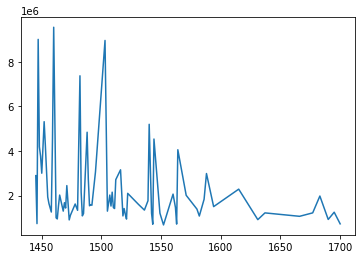

In [15]:
event_name = clusters.sample(1).values[0]
df[df['event'] == event_name]['views'].plot();

## Binning

### Equal width

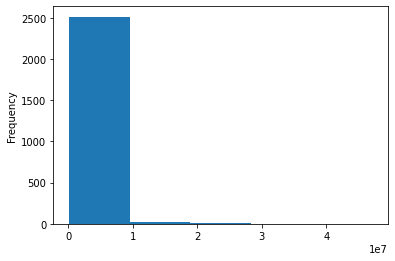

In [16]:
views.plot.hist(bins = 5);

### Equal depth(frequency)

In [17]:
import numpy as np
n = 5
bins = np.sort(df['views'].to_numpy())
bins = (bins - bins.mean())/bins.std()
bins_original = bins

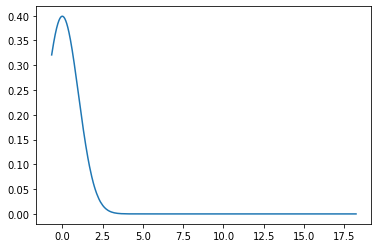

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.plot(bins, stats.norm.pdf(bins,bins.mean(),bins.std()))
plt.show()

In [19]:
bins

array([-0.65967232, -0.6531771 , -0.646844  , ..., 13.05495299,
       16.59619015, 18.22618304])

In [20]:
depth = int(len(bins)/n)
bins = bins.reshape((n,depth))
bins

array([[-0.65967232, -0.6531771 , -0.646844  , ..., -0.40745228,
        -0.40741024, -0.40725292],
       [-0.40689703, -0.40670488, -0.40592545, ..., -0.28607626,
        -0.28597738, -0.28595136],
       [-0.28585969, -0.28579604, -0.28565352, ..., -0.15738357,
        -0.15713216, -0.15688917],
       [-0.15683072, -0.15642199, -0.15639877, ...,  0.10536655,
         0.10709033,  0.10923165],
       [ 0.11005952,  0.11037257,  0.11156833, ..., 13.05495299,
        16.59619015, 18.22618304]])

In [21]:
bins.shape

(5, 510)

In [22]:
bins_mean = list()
bins_median = list()

for b in bins:
  mean = b.mean()
  print("Mean = ",mean)
  median = np.median(b)
  print("Median = ",median,'\n')
  for i in range(len(b)):
    bins_mean.append(mean)
    bins_median.append(median)

Mean =  -0.49426893907736713
Median =  -0.48600585287530407 

Mean =  -0.345835092040759
Median =  -0.34597903917984485 

Mean =  -0.22699007258494208
Median =  -0.22969431957703235 

Mean =  -0.05055725304649879
Median =  -0.06401687688884317 

Mean =  1.1176513567495667
Median =  0.5425317273966472 



### binning with the mean

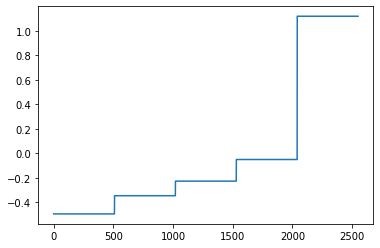

In [23]:
plt.plot(bins_mean);

### binning with the median

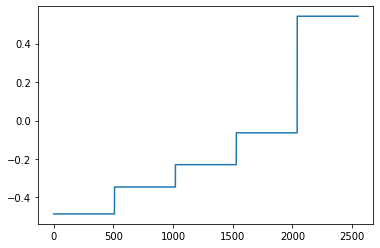

In [24]:
### Binning with the median
plt.plot(bins_median);

### Binning with the boundaries

In [25]:
bins_bound = list()
for binn in bins:
  minimum = binn.min()
  print("Minimum = ",minimum)
  maximum = binn.max()
  print("Maximum = ",maximum,'\n')
  for b in binn:
    bins_bound.append(minimum)

Minimum =  -0.6596723205731446
Maximum =  -0.4072529174408006 

Minimum =  -0.40689703122660575
Maximum =  -0.28595136315149733 

Minimum =  -0.28585968942478124
Maximum =  -0.15688916752543147 

Minimum =  -0.15683072052062558
Maximum =  0.1092316546924401 

Minimum =  0.11005952048654022
Maximum =  18.22618304158943 



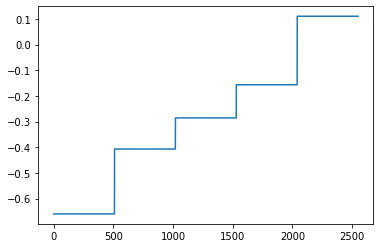

In [26]:
plt.plot(bins_bound);

### plot the original column without binning

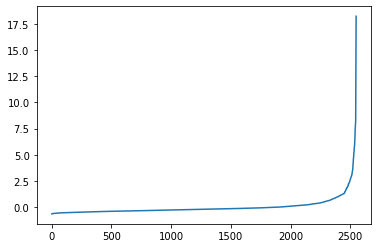

In [27]:
plt.plot(bins_original)

# Correlation Analysis

**get the correlation between the views  and comments column**

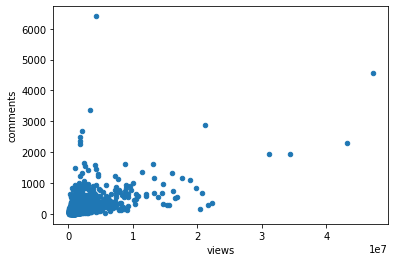

In [28]:
df.plot.scatter(x = 'views', y = 'comments')

In [29]:
a_mean = df['views'].mean()
b_mean = df['comments'].mean()
print(a_mean, b_mean)
s = sum([(a - a_mean)*(b - b_mean) for a,b in zip(df['views'],df['comments'])])
print(s)
cov = sum([(a - a_mean)*(b - b_mean) for a,b in zip(df['views'],df['comments'])])/(len(df)-1)
print(cov)
corr = cov/(df['views'].std()*df['comments'].std())

1698297.4815686275 191.56235294117647
954606272062.4326
374502264.4419116


In [30]:
corr

0.5309387006213677

In [31]:
from scipy.stats import pearsonr
pearsonr(df['views'],df['comments'])

(0.5309387006213676, 1.8033220870969764e-185)